### Note: All outputs have been cleared to reduce the size of the notebook.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

In [33]:
df = pd.read_csv('./archive/spotify_data.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [35]:
df.shape

(1159764, 20)

In [36]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [37]:
distribution_df = df.drop(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'key', 'genre', 'mode', 'valence', 'time_signature'], axis=1)

In [ ]:
px.histogram(distribution_df, x='danceability', color='year')

((array([-4.85641109, -4.67767555, -4.58107406, ...,  4.58107406,
          4.67767555,  4.85641109]),
  array([0.   , 0.   , 0.   , ..., 0.992, 0.992, 0.993])),
 (0.18325516230860667, 0.5374382319161487, 0.9933670969784723))

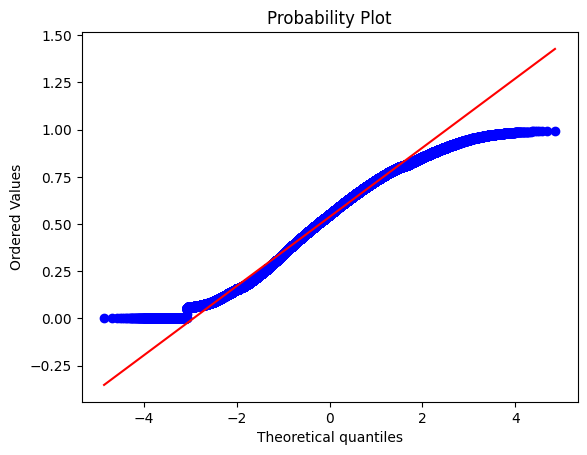

In [39]:
stats.probplot(distribution_df.danceability, plot = plt)

In [30]:
print(f'Skew for Danceability = {distribution_df.danceability.skew()}')

Skew for Danceability = -0.30015795151454894


In [40]:
# drop records that have 0 as danceability
live_df = distribution_df[distribution_df.danceability > 0]
normal_liveness = stats.boxcox(live_df.danceability)

In [41]:
live_df.loc[:, 'danceability'] = normal_liveness[0]

In [ ]:
px.histogram(live_df, x='danceability', color='year', nbins=100)

((array([-4.85620616, -4.67746338, -4.58085777, ...,  4.58085777,
          4.67746338,  4.85620616]),
  array([-0.83489032, -0.82301416, -0.82239521, ..., -0.00799407,
         -0.00799407, -0.00699546])),
 (0.16016323645591296, -0.43350360632551915, 0.9948112807675009))

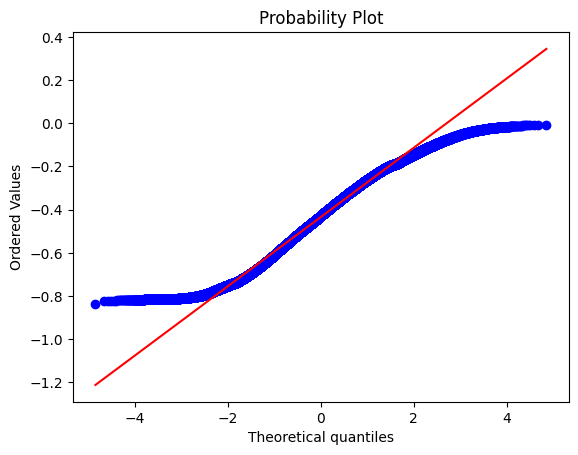

In [42]:
stats.probplot(live_df.danceability, plot = plt)

In [31]:
print(f'Skew for Danceability = {live_df.danceability.skew()}')

Skew for Danceability = -0.13764762979815398


### But the original data has a low enough skewness, so let us proceed with the original data.

Let us assume the following hypothesis for the Danceability distribution:
$$
H_0 : \mu = 0.52
\\
vs
\\
H_1 : \mu \neq 0.52
$$

Here, Variance is unknown.

In [43]:
population_mean = distribution_df.danceability.mean()
population_variance = distribution_df.danceability.var()
sample_size = 100
alpha = 0.05
mu = 0.52

sample_df = distribution_df.sample(n=sample_size, random_state=26)
sample_mean = sample_df.danceability.mean()

# We estimate variance
var_ = 0
n = sample_df.shape[0]
for x in sample_df.danceability:
    var_ += (x-sample_mean)**2
var_ = var_ / (n - 1)
print(f'Population Mean = {population_mean}\nSample Mean = {sample_mean}')
print(f'Population variance = {population_variance}\nSample variance = {var_}')

Population Mean = 0.5374382319161484
Sample Mean = 0.5373319999999999
Population variance = 0.034032145985789214
Sample variance = 0.03946170522828283


In [44]:
Z_cal = (sample_mean - 0.52)/np.sqrt(var_/n)
p_value = 2 * (1 - (stats.norm.cdf(np.abs(Z_cal))))

print(f'P Value = {p_value}\nLevel of Significance = {alpha}\nReject H_0: {p_value < alpha}')

P Value = 0.3829407944295715
Level of Significance = 0.05
Reject H_0: False


Testing the variance:
$$
H_0 : \sigma^2 = 0.03
\\
vs
\\
H_1 : \sigma^2 \neq 0.03
\\
\text{Given:}
\\
\mu = 0.5374
$$

Here, mean is known.

In [45]:
#  var_ stores the sample variance
# Calculating thetest statistic for Variance:

sigma = 0.03

chi2_cal = ((sample_size - 1) * var_)/sigma

$$
\text{Now, we calculate the p-value as:}\\
\text{p-value} = 2 * P(\chi^2 > \chi^2_{cal})
$$

In [46]:
p_value = 2 * (1 - stats.chi2.cdf(chi2_cal, sample_size))
print(f'P Value = {p_value}\nLevel of Significance = {alpha}\nReject H_0: {p_value < alpha}')

P Value = 0.04556913649575001
Level of Significance = 0.05
Reject H_0: True


# Now, let us look at the Liveness feature

In [ ]:
px.histogram(distribution_df, x='liveness', color='year')

In [12]:
print(f'Skew for Liveness = {distribution_df.liveness.skew()}')

Skew for Liveness = 1.9556522316451774


((array([-4.85641109, -4.67767555, -4.58107406, ...,  4.58107406,
          4.67767555,  4.85641109]),
  array([0., 0., 0., ..., 1., 1., 1.])),
 (0.1738672508306772, 0.22301887352944222, 0.8647034877683657))

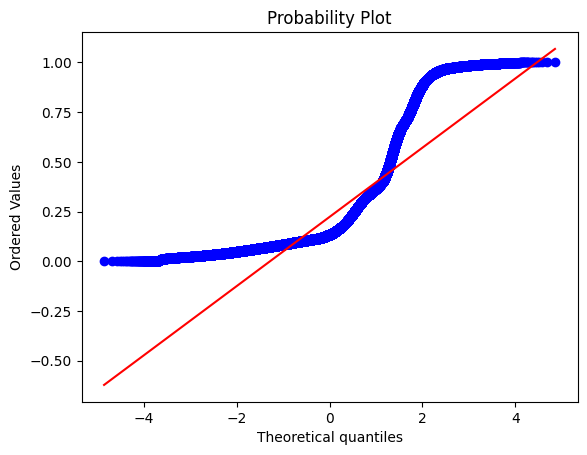

In [47]:
stats.probplot(distribution_df.liveness, plot = plt)

### The data is not normal. Let us make it normal using the boxcox method

In [48]:
# drop records that have 0 as liveness
live_df = distribution_df[distribution_df.liveness > 0]
normal_liveness = stats.boxcox(live_df.liveness)

In [49]:
live_df.loc[:, 'liveness'] = normal_liveness[0]

In [ ]:
px.histogram(live_df, x='liveness', color='year')

In [50]:
print(f'Skew for Liveness = {live_df.liveness.skew()}')

Skew for Liveness = 0.024711234325236153


((array([-4.85638666, -4.67765026, -4.58104828, ...,  4.58104828,
          4.67765026,  4.85638666]),
  array([-11.49118987, -11.33994782, -11.05076248, ...,   0.        ,
           0.        ,   0.        ])),
 (1.1822531716262816, -2.460272379140629, 0.9895294136699098))

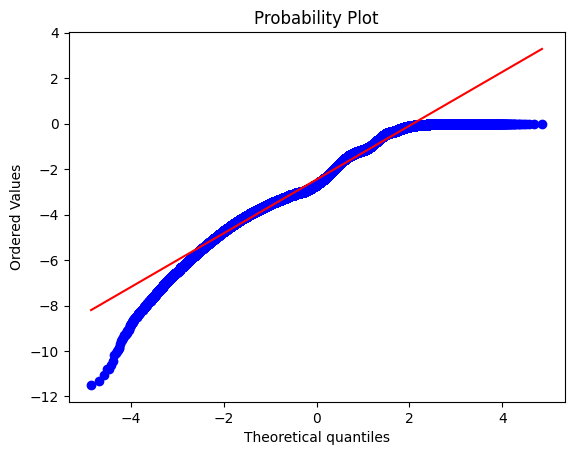

In [51]:
stats.probplot(live_df.liveness, plot = plt)

In [52]:
print(f'Skew for Liveness = {live_df.liveness.skew()}')

Skew for Liveness = 0.024711234325236153


## The data is now somewhat normal. Let us test the following hypotheses:

$$
H_0 : \mu = -2.5
\\
vs
\\
H_1 : \mu > -2.5
$$



In [15]:
population_mean = live_df.liveness.mean()
population_variance = live_df.liveness.var()
sample_size = 100
alpha = 0.05
mu = -2.5

sample_df = live_df.sample(n=sample_size, random_state=99)
sample_mean = sample_df.liveness.mean()

# We estimate variance
var_ = 0
n = sample_df.shape[0]
for x in sample_df.liveness:
    var_ += (x-sample_mean)**2
var_ = var_ / (n - 1)
print(f'Population Mean = {population_mean}\nSample Mean = {sample_mean}')
print(f'Population variance = {population_variance}\nSample variance = {var_}')

Population Mean = -2.4602723791406285
Sample Mean = -2.7187678821554817
Population variance = 1.4274470291243428
Sample variance = 1.1531259644239455


In [16]:
Z_cal = (sample_mean - mu)/np.sqrt(var_/n)
p_value = stats.norm.cdf(Z_cal)

print(f'P Value = {p_value}\nLevel of Significance = {alpha}\nReject H_0: {p_value < alpha}')

P Value = 0.020812295647389595
Level of Significance = 0.05
Reject H_0: True


Testing the variance:
$$
H_0 : \sigma^2 = 1.4
\\
vs
\\
H_1 : \sigma^2 < 1.4
\\
\text{Given:}
\\
\mu = -2.7188
$$

Here, mean is known.

In [17]:
#  var_ stores the sample variance
# Calculating thetest statistic for Variance:

sigma = 1.4

chi2_cal = ((sample_size - 1) * var_)/sigma

print(chi2_cal)

81.54247891283616


$$
\text{Now, we calculate the p-value as:}\\
\text{p-value} = P(\chi^2 < \chi^2_{cal})
$$

In [19]:
p_value = (stats.chi2.cdf(chi2_cal, sample_size))
print(f'P Value = {p_value}\nLevel of Significance = {alpha}\nReject H_0: {p_value < alpha}')

P Value = 0.08891779786169042
Level of Significance = 0.05
Reject H_0: False


In [ ]:
del live_df
del normal_liveness

In [53]:
px.imshow(distribution_df.drop('year', axis=1).corr().round(2), text_auto=True, aspect='auto')

##### We see that features such as Energy and Loudness are very positively corelated, while features like energy and acousticness or loudness and acousticness are negatively correlated.

In [54]:
px.scatter(distribution_df.sample(1000), x='energy', y='loudness', trendline='ols')

In [55]:
px.scatter(distribution_df.sample(1000), x='energy', y='acousticness', trendline='ols')

In [56]:
px.scatter(distribution_df.sample(1000), x='loudness', y='acousticness', trendline='ols')


### Let us Study the genres now

In [57]:
years = df.year.value_counts()
years = list(years.sort_index().index)

In [58]:
yearly_top100 = {}
for year in years:
    yearly_top100[year] = df[df['year'] == year].sort_values(by='popularity', axis=0, ascending=False).head(5000)

We are constructing a dataframe that stores the frequency of genres in the top 5000 songs over the years.

In [59]:
genre_dict = {}
for year in years:
    genres = yearly_top100[year].genre.value_counts()
    for genre, count in genres.items():
        if genre_dict.get(genre):
            genre_dict[genre].append((year, count))
        else:
            genre_dict[genre] = [(year, count),]

In [60]:
genre_counts = pd.DataFrame(index=years)
for key in genre_dict.keys():
    temp = pd.Series(index=years)
    for gen in genre_dict[key]:
        temp[gen[0]] = gen[1]
    if gen[0] > 2018 and temp.sum() > 2500:
        genre_counts[key] = temp
        genre_counts[key].fillna(temp.min(), inplace=True)

In [61]:
px.line(genre_counts)

In [62]:
fig = make_subplots(rows=7, cols=2, subplot_titles=tuple(genre_counts.columns))
index = 0
for row in range(1,8):
    for col in range(1,3):
        fig.add_trace(go.Scatter(x = years, y = genre_counts.iloc[:,index], mode='lines'), row=row, col=col)
        index += 1

# Update subplot layout
fig.update_layout(title="Genre Trends", showlegend=False, height=1200)

# Show the subplot figure
fig.show()

## Inferences

* Alt-rock has gradually declined in popularity.
* Dance and Pop have remained fairly stable in popularity.
    * Interestingly, in the year 2015, Dance plummeted in popularity, while Pop spiked.
    * Electro music also had a spike in popularity during 2015. That was the year edm and dubstep became mainstream.
* Hip Hop, K-pop, French music and Indie-pop have also been growing in popularity. Hip Hop is currently the most popular Genre.

In [63]:
px.imshow(genre_counts.corr().round(2), text_auto=True, aspect='auto')

* On further analysing the decline of alt-rock, it is strongly negatively correlated to the following genres: 
    * Indie-Pop
    * K-pop
    * French
    * Country
    * Hip-Hop

In [64]:
genres = ('indie-pop', 'k-pop', 'french', 'country', 'hip-hop')
fig = make_subplots(rows=5, cols=1, subplot_titles= genres)
index=0
for row in range(1,6):
    fig.add_trace(go.Scatter(x = years, y = genre_counts.loc[:,genres[index]], text=[genres[index] for year in years], hoverinfo='x+y+text', name=genres[index]), row=row, col=1)
    fig.add_trace(go.Scatter(x = years, y = genre_counts.loc[:,'alt-rock'], text=['alt_rock' for year in years], hoverinfo='x+y+text', name='alt-rock', line=dict(color='purple', width=2)), row=row, col=1)
    index += 1

# Update subplot layout
fig.update_layout(title="Genre Trends", showlegend=True, height=1200)

# Show the subplot figure
fig.show()

### Let us try and study the reasons why pop and dance genres have dominated the marcket so far.

In [65]:
top_df = pd.concat([yearly_top100[year] for year in years])
top_df = pd.concat([top_df[top_df['genre'] == 'pop'], top_df[top_df['genre'] == 'dance']])

Plotting: danceability
Plotting: energy
Plotting: key
Plotting: loudness
Plotting: mode
Plotting: speechiness
Plotting: acousticness
Plotting: liveness
Plotting: valence
Plotting: tempo


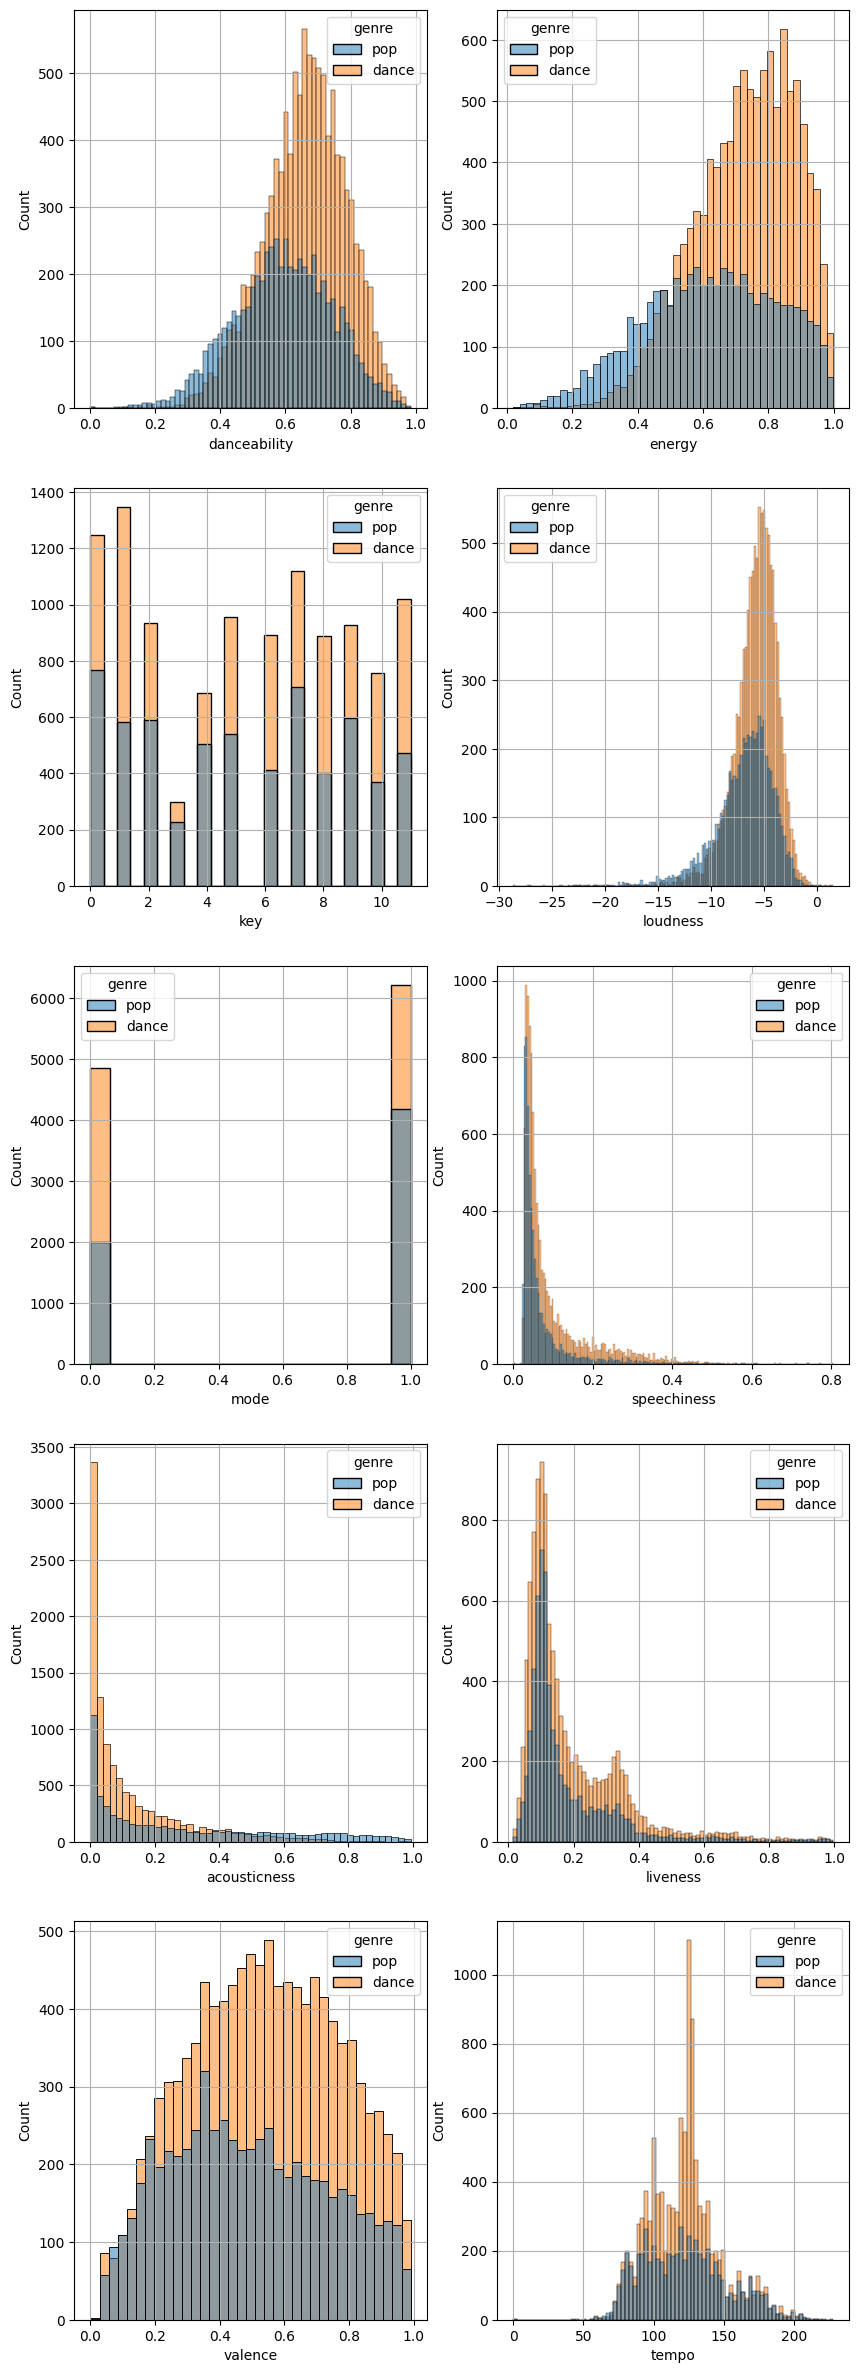

In [66]:
feature_list = ['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',]

fig, ax = plt.subplots(5,2,figsize=(10,30))

index=0
for row in range(5):
    for col in range(2):
        print(f'Plotting: {feature_list[index]}')
        sns.histplot(top_df, x=feature_list[index], hue='genre', ax=ax[row,col])
        ax[row,col].grid()
        index += 1

plt.show()

In [67]:
top_df = pd.concat([yearly_top100[year] for year in years])
top_df = pd.concat([top_df[top_df['genre'] == 'hip-hop'], top_df[top_df['genre'] == 'dance']])

Plotting: danceability
Plotting: energy
Plotting: key
Plotting: loudness
Plotting: mode
Plotting: speechiness
Plotting: acousticness
Plotting: liveness
Plotting: valence
Plotting: tempo


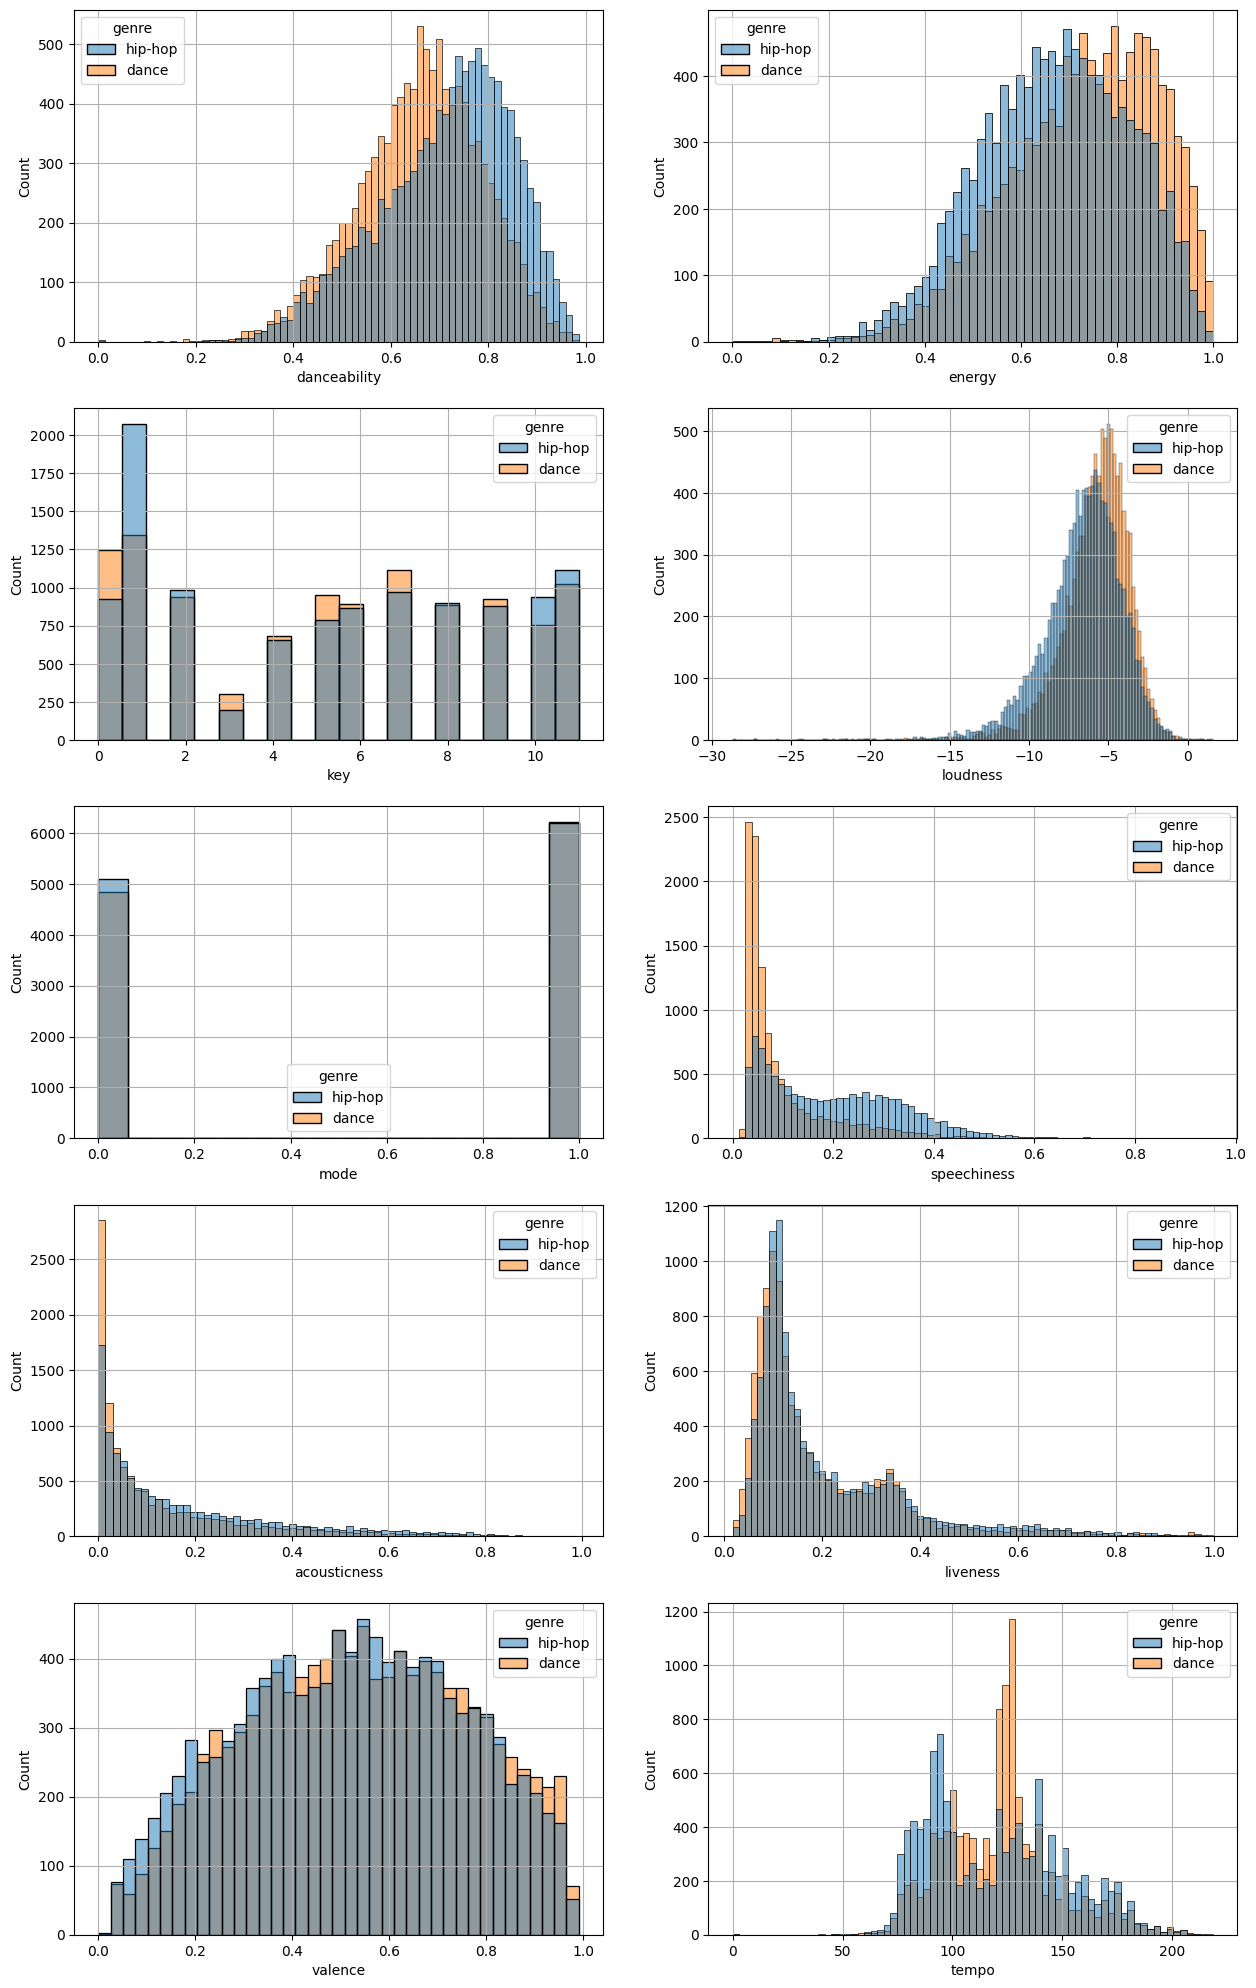

In [68]:
feature_list = ['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',]

fig, ax = plt.subplots(5,2,figsize=(15,25))
# fig.suptitle('Variation of features between hip-hop and dance')
index=0
for row in range(5):
    for col in range(2):
        print(f'Plotting: {feature_list[index]}')
        sns.histplot(top_df, x=feature_list[index], hue='genre', ax=ax[row,col])
        ax[row,col].grid()
        index += 1

plt.show()

In [69]:
dance_danceability_mean = top_df[top_df.genre == 'dance'].danceability.mean()
hiphop_danceability_mean = top_df[top_df.genre == 'hip-hop'].danceability.mean()

dance_energy_mean = top_df[top_df.genre == 'dance'].energy.mean()
hiphop_energy_mean = top_df[top_df.genre == 'hip-hop'].energy.mean()

print(f'Mean danceability for Dance = {dance_danceability_mean}')
print(f'Mean danceability for Hip-Hop = {hiphop_danceability_mean}')

print(f'Mean energy for Dance = {dance_energy_mean}')
print(f'Mean energy for Hip-Hop = {hiphop_energy_mean}')


Mean danceability for Dance = 0.6607343693530899
Mean danceability for Hip-Hop = 0.7135509607721597
Mean energy for Dance = 0.7299632092518974
Mean energy for Hip-Hop = 0.6698568974586027


$$
\text{Let X represent the population of dance genre, and Y represent the hip-hop genre, and the energy feature both follow a normal distribution.}
\\
X \sim N(\mu_1, \sigma_1^2)
\\
Y \sim N(\mu_2, \sigma_2^2)
\\
H_0 : \mu_1 = \mu_2
\\
\text{vs}
\\
H_1: \mu_1 \neq \mu_2
$$
#### Or equivalently,<br>
$$
H_0 : \mu_1 - \mu_2 \lt \delta
\\
\text{vs}
\\
H_1: \mu_1 - \mu_2 \gt \delta
$$


In [70]:
sample_size = 100
random_state = 55
hiphop = top_df[top_df.genre == 'hip-hop'].sample(sample_size, random_state = random_state)
dance = top_df[top_df.genre == 'dance'].sample(sample_size, random_state = random_state)

print('Hip-Hop Energy:')
print(f'Mean Energy = {hiphop.energy.mean()}\nEnergy Variance = {hiphop.energy.var()}')
print('\nDance Energy:')
print(f'Mean Energy = {dance.energy.mean()}\nEnergy Variance = {dance.energy.var()}')



Hip-Hop Energy:
Mean Energy = 0.6649299999999999
Energy Variance = 0.02594675262626262

Dance Energy:
Mean Energy = 0.7317100000000001
Energy Variance = 0.02458228878787879


In [71]:
delta = 0.01
alpha = 0.05
hiphop_mean = hiphop.energy.mean()
hiphop_var = hiphop.energy.var()

dance_mean = dance.energy.mean()
dance_var = dance.energy.var()

Z_cal = np.abs((dance_mean - hiphop_mean) - delta) / np.sqrt((hiphop_var + dance_var) / sample_size)

p_value = 2 * (1 - stats.norm.cdf(Z_cal))

print(f'Level of Significance = {alpha}')
print(f'Z calculated = {Z_cal}')
print(f'p-value = {p_value}')
print(f'Reject H_0: {p_value < alpha}')

Level of Significance = 0.05
Z calculated = 2.5259506332776325
p-value = 0.011538569395171283
Reject H_0: True
